GitHub Link:
https://github.com/EricBaiBusiness/Luxurious-Hotel-Review

# Dataset Upload

In [9]:
!pip install opendatasets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import pandas as pd
import seaborn as sns
import folium
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
import opendatasets as od
# Eric's Kaggle API key
# "username":"ericthedataguy",
# "key":"875c0de0faea2fefa081c78eb470a347"

od.download(
    "https://www.kaggle.com/datasets/ericthedataguy/cleaned-hotel-review-for-ba820")
df = pd.read_csv("/content/cleaned-hotel-review-for-ba820/hotel_reviews_cleaned.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Skipping, found downloaded files in "./cleaned-hotel-review-for-ba820" (use force=True to force download)


In [7]:
df = pd.read_csv("/content/cleaned-hotel-review-for-ba820/hotel_reviews_cleaned.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
subset_df = df.sample(n=10000, random_state=1729)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Save the DataFrame as a CSV file in the current Colab environment
subset_df.to_csv('subset_df.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
from google.colab import files

# Download the file to your local system
files.download('subset_df.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 327357 to 309014
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               10000 non-null  object 
 1   Additional_Number_of_Scoring                10000 non-null  int64  
 2   Review_Date                                 10000 non-null  object 
 3   Average_Score                               10000 non-null  float64
 4   Hotel_Name                                  10000 non-null  object 
 5   Reviewer_Nationality                        10000 non-null  object 
 6   Negative_Review                             10000 non-null  object 
 7   Review_Total_Negative_Word_Counts           10000 non-null  int64  
 8   Total_Number_of_Reviews                     10000 non-null  int64  
 9   Positive_Review                             10000 non-null  object 
 10  Revi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Sentiment Analysis

## Step 1: Preprocess the Reviews
We will clean the reviews by removing any non-relevant characters and standardizing the text. This includes:

- Lowercasing all text to ensure uniformity.
- Removing punctuation, numbers, and other non-letter characters.
- Stripping whitespace and any placeholder texts like "No Negative" or "No Positive".

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download necessary NLTK resources
# 下载必要的 NLTK 资源：这是为了确保在运行时能够访问 NLTK 所需的资源文件，包括词性标注器、停用词列表等
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
# 初始化词元化器：这里使用的是 WordNetLemmatizer，它用于将单词转换为它们的基本形式（词元）
lemmatizer = WordNetLemmatizer()

# Stop words in English
# 定义停用词集合：这是用于移除文本中无意义词语的集合，例如 "the"、"is"、"are" 等
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join the tokens back into a string
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the positive and negative reviews
# 应用预处理函数到正面和负面评论列：这里使用 apply 函数将 preprocess_text 函数应用到 DataFrame 中的 Positive_Review 和 Negative_Review 列
# 并将结果存储在新的列 Processed_Positive_Review 和 Processed_Negative_Review 中
subset_df['Processed_Positive_Review'] = subset_df['Positive_Review'].apply(preprocess_text)
subset_df['Processed_Negative_Review'] = subset_df['Negative_Review'].apply(preprocess_text)

# Display the first few rows to verify the preprocessing
subset_df[['Positive_Review', 'Processed_Positive_Review', 'Negative_Review', 'Processed_Negative_Review']].head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Positive_Review,Processed_Positive_Review,Negative_Review,Processed_Negative_Review
327357,The staff were SO accommodating to us a young...,staff accommodating u young group reassuring s...,No Negative,negative
271972,Breakfast is excellent and the view is stunning,breakfast excellent view stunning,A part of the hotel is under construction so ...,part hotel construction bit noisy 7
22048,Professional and very friendly and helpful st...,professional friendly helpful staff acomodatin...,A less noisy aircondition Free coffee in lobb...,le noisy aircondition free coffee lobby macine...
433239,Super position beds very comfy employees very...,super position bed comfy employee smily helpfu...,First night only decaffeinated coffee in room...,first night decaffeinated coffee room second n...
171350,perfectly central for doing London rooms were...,perfectly central london room really comfortab...,No Negative,negative


## Step 2: Text Representation
We will represent the text numerically so that a machine learning model can process it. We'll use a model like Word2Vec to convert the text into vectors (embeddings). These embeddings capture semantic meaning and context.

In [16]:
import gensim.downloader as api
from nltk.tokenize import word_tokenize
import numpy as np

# Load Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
def text_to_word2vec(text):
    # Tokenize text
    # 函数会将输入文本进行分词
    tokens = word_tokenize(text)
    # Filter tokens that are in the model's vocabulary
    # 函数会过滤掉不在 Word2Vec 模型词汇表中的词语，只保留在模型词汇表中的词语
    tokens = [token for token in tokens if token in word2vec_model.key_to_index]
    if tokens:
        # 保留下来的词语，函数会获取它们对应的 Word2Vec 向量
        # 最后，函数会计算这些词语向量的均值，得到文本的表示向量，并返回该向量
        # Calculate the mean of Word2Vec vectors for the tokens
        word_vectors = [word2vec_model.get_vector(token) for token in tokens]
        text_vector = np.mean(word_vectors, axis=0)
        return text_vector
    else:
        # If no tokens found in the vocabulary, return None
        return None

# 将 text_to_word2vec 函数应用到了处理后的正面和负面评论列
# 将 text_to_word2vec 函数应用到每一条评论文本上，并将返回的 Word2Vec 向量存储到新的列中
# Apply text_to_word2vec function to the processed positive and negative reviews
subset_df['Positive_Review_Word2Vec'] = subset_df['Processed_Positive_Review'].apply(text_to_word2vec)
subset_df['Negative_Review_Word2Vec'] = subset_df['Processed_Negative_Review'].apply(text_to_word2vec)

# Display the first few rows to verify the text representation
print(subset_df[['Positive_Review', 'Positive_Review_Word2Vec', 'Negative_Review', 'Negative_Review_Word2Vec']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          Positive_Review  \
327357   The staff were SO accommodating to us a young...   
271972   Breakfast is excellent and the view is stunning    
22048    Professional and very friendly and helpful st...   
433239   Super position beds very comfy employees very...   
171350   perfectly central for doing London rooms were...   

                                 Positive_Review_Word2Vec  \
327357  [-0.025326896, 0.053632848, 0.032610726, 0.019...   
271972  [-0.072021484, -0.015602112, -0.12219238, 0.08...   
22048   [-0.0032780964, 0.05812645, -0.03002421, 0.138...   
433239  [0.005272692, -0.017522639, -0.036615547, 0.14...   
171350  [-0.06958008, 0.035731725, -0.0029209682, 0.07...   

                                          Negative_Review  \
327357                                        No Negative   
271972   A part of the hotel is under construction so ...   
22048    A less noisy aircondition Free coffee in lobb...   
433239   First night o

## Step 3: Obtain Sentiment Embeddings
We need vectors (embeddings) that represent positive and negative sentiment. We will create these by averaging the embeddings of words that are commonly associated with positive and negative sentiments. This will give us a centroid for positive and negative sentiment.

In [19]:
import numpy as np

# Define positive and negative words
positive_words = ["good", "nice", "excellent", "positive", "great", "joyful", "wonderful", "amazing"]
negative_words = ["bad", "terrible", "negative", "awful", "horrible", "disappointing"]

def get_sentiment_embedding(words, model):
    # Filter words that are in the model's vocabulary
    words = [word for word in words if word in model.key_to_index]
    if words:
        # Calculate the mean of Word2Vec vectors for the words
        word_vectors = [model.get_vector(word) for word in words]
        sentiment_embedding = np.mean(word_vectors, axis=0)
        return sentiment_embedding
    else:
        # If no words found in the vocabulary, return None
        return None

# Obtain sentiment embeddings for positive and negative words using Word2Vec model
positive_sentiment_embedding = get_sentiment_embedding(positive_words, word2vec_model)
negative_sentiment_embedding = get_sentiment_embedding(negative_words, word2vec_model)

# Display sentiment embeddings
print("Positive Sentiment Embedding:", positive_sentiment_embedding)
print("Negative Sentiment Embedding:", negative_sentiment_embedding)


Positive Sentiment Embedding: [ 4.01916504e-02  3.83605957e-02 -5.11474609e-02  8.50067139e-02
  6.52008057e-02 -1.01646423e-01  8.02001953e-02 -2.07366943e-02
 -3.07922363e-02  1.96350098e-01 -1.26892090e-01 -1.27754211e-01
  5.77087402e-02  5.27954102e-03  3.27453613e-02  1.77612305e-01
  1.76086426e-01  1.61102295e-01 -9.43908691e-02 -3.14102173e-02
  2.83181071e-02  2.39257812e-01  7.07092285e-02  1.54876709e-02
  1.39064789e-01  7.01713562e-03 -4.09393311e-02  6.93054199e-02
  8.01239014e-02 -7.07015991e-02 -1.00646973e-01 -3.98635864e-02
  2.04360962e-01  1.05074883e-01  1.05834961e-01 -2.26669312e-02
 -3.95050049e-02 -3.91464233e-02 -1.40209198e-02  9.25903320e-02
  2.33795166e-01 -5.40308952e-02  1.51905060e-01  3.55834961e-02
 -1.57165527e-03 -4.89120483e-02  9.27124023e-02  5.85937500e-03
 -3.75175476e-03 -7.73773193e-02  6.12258911e-02  1.26190186e-01
 -5.77697754e-02  1.44927979e-01 -1.52587891e-05  3.87706757e-02
 -6.93664551e-02 -1.35925293e-01  1.70654297e-01 -1.27012253

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Step 4: Calculate Similarity Scores
We'll measure the cosine similarity between the review embeddings and our positive/negative centroids. Cosine similarity is a measure that tells us how similar two vectors are.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Positive and negative sentiment centroids
positive_centroid = positive_sentiment_embedding.reshape(1, -1)  # Reshape to match dimensions
negative_centroid = negative_sentiment_embedding.reshape(1, -1)

# Calculate cosine similarity between review embeddings and positive/negative centroids
subset_df['Cosine_Similarity_Positive'] = subset_df['Positive_Review_Word2Vec'].apply(lambda x: cosine_similarity(x.reshape(1, -1), positive_centroid)[0][0] if x is not None else None)
subset_df['Cosine_Similarity_Negative'] = subset_df['Negative_Review_Word2Vec'].apply(lambda x: cosine_similarity(x.reshape(1, -1), negative_centroid)[0][0] if x is not None else None)

# Display the first few rows to verify the similarity scores
print(subset_df[['Positive_Review', 'Cosine_Similarity_Positive', 'Negative_Review', 'Cosine_Similarity_Negative']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          Positive_Review  \
327357   The staff were SO accommodating to us a young...   
271972   Breakfast is excellent and the view is stunning    
22048    Professional and very friendly and helpful st...   
433239   Super position beds very comfy employees very...   
171350   perfectly central for doing London rooms were...   

        Cosine_Similarity_Positive  \
327357                    0.519034   
271972                    0.615120   
22048                     0.706527   
433239                    0.515813   
171350                    0.577415   

                                          Negative_Review  \
327357                                        No Negative   
271972   A part of the hotel is under construction so ...   
22048    A less noisy aircondition Free coffee in lobb...   
433239   First night only decaffeinated coffee in room...   
171350                                        No Negative   

        Cosine_Similarity_Negative  


## Step 5: Compute Sentiment Scores
The sentiment score for each review is calculated by subtracting its negative similarity score from its positive similarity score. A higher positive score suggests a positive sentiment and vice versa.



In [22]:
# Compute sentiment scores
subset_df['Sentiment_Score'] = subset_df['Cosine_Similarity_Positive'] - subset_df['Cosine_Similarity_Negative']

# Display the first few rows to verify the sentiment scores
print(subset_df[['Positive_Review', 'Cosine_Similarity_Positive', 'Negative_Review', 'Cosine_Similarity_Negative', 'Sentiment_Score']].head())


                                          Positive_Review  \
327357   The staff were SO accommodating to us a young...   
271972   Breakfast is excellent and the view is stunning    
22048    Professional and very friendly and helpful st...   
433239   Super position beds very comfy employees very...   
171350   perfectly central for doing London rooms were...   

        Cosine_Similarity_Positive  \
327357                    0.519034   
271972                    0.615120   
22048                     0.706527   
433239                    0.515813   
171350                    0.577415   

                                          Negative_Review  \
327357                                        No Negative   
271972   A part of the hotel is under construction so ...   
22048    A less noisy aircondition Free coffee in lobb...   
433239   First night only decaffeinated coffee in room...   
171350                                        No Negative   

        Cosine_Similarity_Negative  S

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Step 6: Analyze the Results
We'll look at the distribution of sentiment scores across the dataset and can summarize the overall sentiment towards the hotels.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


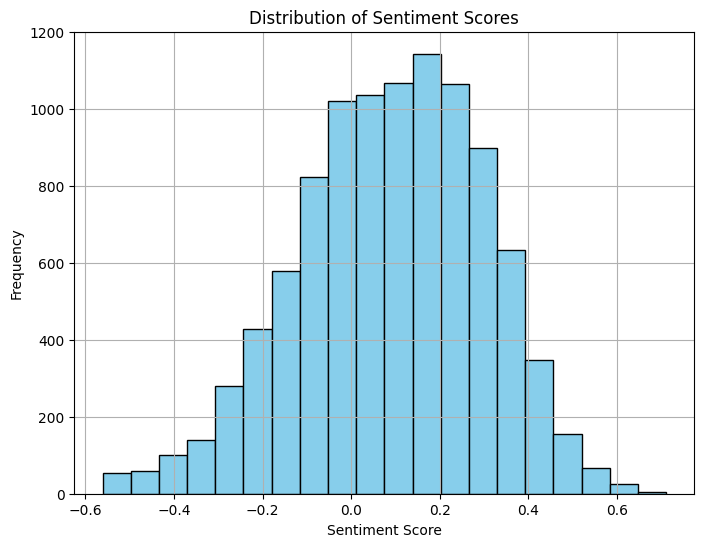

count    9924.000000
mean        0.089477
std         0.209913
min        -0.561371
25%        -0.051046
50%         0.099852
75%         0.244802
max         0.711168
Name: Sentiment_Score, dtype: float64


In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
subset_df['Sentiment_Score'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Compute summary statistics of sentiment scores
summary_stats = subset_df['Sentiment_Score'].describe()
print(summary_stats)


From the histogram, we can observe a few characteristics about your dataset:

- The distribution is somewhat normal with a slight skew towards positive sentiment, as indicated by the mean sentiment score being positive (around 0.089).
- There's a concentration of scores around the mean, with fewer instances as the scores approach the extremes (-0.6 and 0.6).
- The standard deviation is around 0.21, which suggests that there's a moderate spread of sentiment scores around the mean.

Based on the summary statistics of the sentiment scores:

- The count indicates that there are 9924 non-null sentiment scores in the dataset.
- The mean sentiment score is approximately 0.089, indicating a slightly positive overall sentiment across the reviews.
- The standard deviation (std) of around 0.21 suggests variability in sentiment scores among the reviews.
- The minimum sentiment score is approximately -0.561, indicating the most negative sentiment observed in the dataset.
- The maximum sentiment score is approximately 0.711, indicating the most positive sentiment observed in the dataset.
- The 25th percentile (Q1) is around -0.051, the median (50th percentile or Q2) is around 0.100, and the 75th percentile (Q3) is around 0.245, providing insights into the distribution of sentiment scores.